<a href="https://colab.research.google.com/github/aleenakhalil/Housing_Data_Feature_Engineering/blob/main/Feature_Engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Feature Engineering for Predictive Modeling (Kaggle House Prices Dataset)

Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Loading the Dataset

In [2]:
df=pd.read_csv('Kaggle_Housing.csv')

Previewing the Dataset

In [3]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [6]:
df.isnull().sum()

,0
price,0
area,0
bedrooms,0
bathrooms,0
stories,0
mainroad,0
guestroom,0
basement,0
hotwaterheating,0
airconditioning,0


Encoding yes/no values to binary (0/1)

In [7]:
categorical_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']
for col in categorical_cols[:-1]:
    df[col] = df[col].map({'yes': 1, 'no': 0})

One hot Encoding for Furnishingstatus which has 3 values

In [8]:
df = pd.get_dummies(df, columns=['furnishingstatus'], drop_first=True)

In [11]:
df.head(7)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,False,False
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,False,False
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,True,False
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,False,False
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,False,False
5,10850000,7500,3,3,1,1,0,1,0,1,2,1,True,False
6,10150000,8580,4,3,4,1,0,0,0,1,2,1,True,False


Converting boolean columns to integers (0/1)

In [12]:
df['furnishingstatus_semi-furnished'] = df['furnishingstatus_semi-furnished'].astype(int)
df['furnishingstatus_unfurnished'] = df['furnishingstatus_unfurnished'].astype(int)

Creating New Features

In [14]:
df['total_rooms'] = df['bedrooms'] + df['bathrooms']

In [15]:
df['area_per_room'] = df['area'] / df['total_rooms']

Higher score = more luxuries

In [17]:
luxuries = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
df['total_luxuries'] = df[luxuries].sum(axis=1)

df[['total_rooms', 'area_per_room', 'total_luxuries']].head()

,total_rooms,area_per_room,total_luxuries
0,6,1236.666667,3
1,8,1120.000000,2
2,5,1992.000000,3
3,6,1250.000000,4
4,5,1484.000000,4


Selecting Features

In [18]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [22]:
X_feat = df.drop('price', axis=1)
y_feat = df['price']

Train Test Split

In [23]:
X_train_f, X_test_f, y_train_f, y_test_f = train_test_split(X_feat, y_feat, test_size=0.2, random_state=42)

Training Rnadom Forest Model with Feature Engineering

In [24]:
model = RandomForestRegressor(random_state=42)
model.fit(X_train_f, y_train_f)
y_pred_f = model.predict(X_test_f)
r2_feat = r2_score(y_test_f, y_pred_f)

Basic Model without Feature Engineering

In [25]:
X_basic = df[['area', 'bedrooms', 'bathrooms', 'stories', 'parking']]
y_basic = df['price']

X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X_basic, y_basic, test_size=0.2, random_state=42)

In [26]:
model_basic = RandomForestRegressor(random_state=42)
model_basic.fit(X_train_b, y_train_b)
y_pred_b = model_basic.predict(X_test_b)
r2_basic = r2_score(y_test_b, y_pred_b)

Feature Importances

<ipython-input-29-a1a13ca42037>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features, y=top_features.index, palette='viridis')


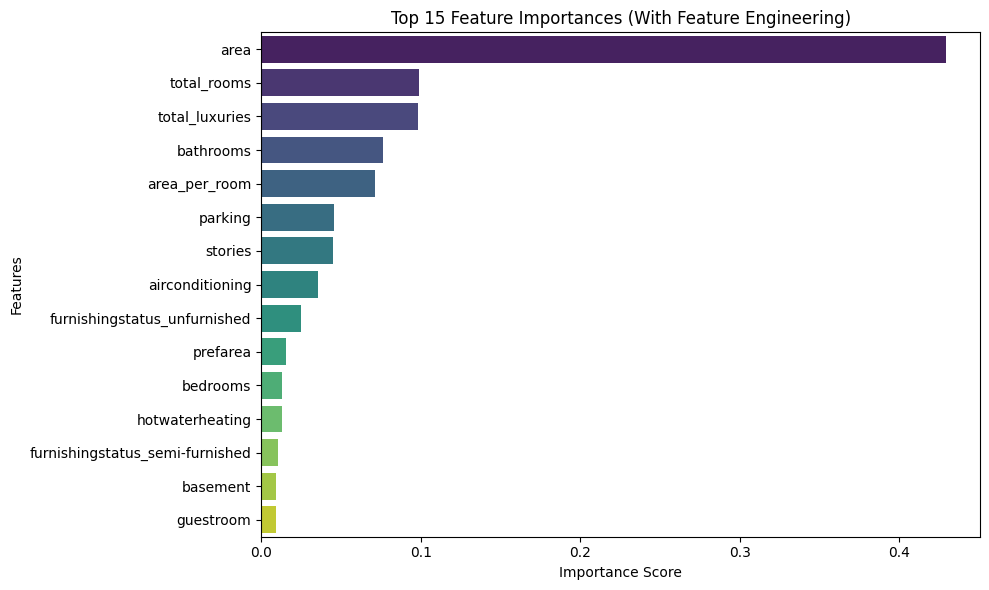

In [29]:
importances = pd.Series(model.feature_importances_, index=X_feat.columns)
top_features = importances.sort_values(ascending=False)[:15]

plt.figure(figsize=(10, 6))
sns.barplot(x=top_features, y=top_features.index, palette='viridis')
plt.title("Top 15 Feature Importances (With Feature Engineering)")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

R2 Score Comparison

<ipython-input-30-ca8b7ee37958>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels, y=scores, palette="Set2")


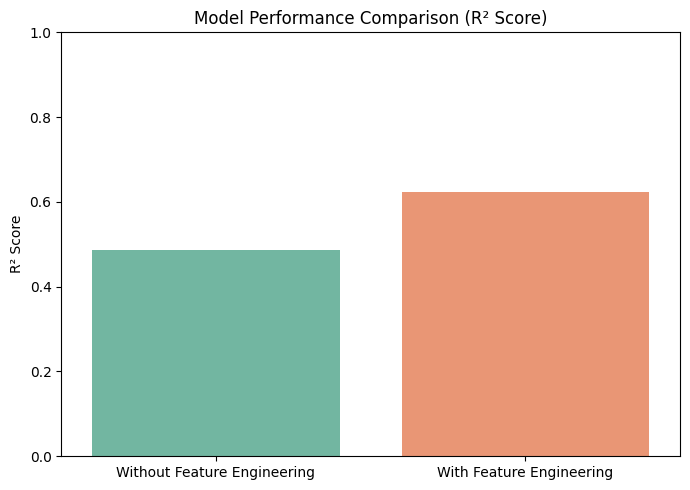

In [30]:
scores = [r2_basic, r2_feat]
labels = ['Without Feature Engineering', 'With Feature Engineering']

plt.figure(figsize=(7, 5))
sns.barplot(x=labels, y=scores, palette="Set2")
plt.title("Model Performance Comparison (R² Score)")
plt.ylabel("R² Score")
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

In [31]:
print(f"R² Score WITHOUT Feature Engineering: {r2_basic:.4f}")
print(f"R² Score WITH Feature Engineering:    {r2_feat:.4f}")

R² Score WITHOUT Feature Engineering: 0.4869
R² Score WITH Feature Engineering:    0.6244
